In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#upload the datasets
from google.colab import files
uploaded=files.upload()

Saving Sales Data.csv to Sales Data.csv


In [5]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

In [6]:
#displaying first five records
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [7]:
#checking the shape
df.shape

(185950, 11)

In [9]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [10]:
#descriptive statistics
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


Data Cleaning and Preprocessing

In [11]:
#drop the irrevalant coloumn "unnamned : 0"
df.drop(columns="Unnamed: 0", inplace=True)

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [13]:
#Rename Column
df.columns = ["order_id",
                 "product",
                 "quantity",
                 "price_each",
                 "order_date",
                 "purchase_address",
                 "month",
                 "sales_amount",
                 "city",
                 "hour"]

df.columns

Index(['order_id', 'product', 'quantity', 'price_each', 'order_date',
       'purchase_address', 'month', 'sales_amount', 'city', 'hour'],
      dtype='object')

In [14]:
df.head()

,order_id,product,quantity,price_each,order_date,purchase_address,month,sales_amount,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


## Examine columns with "object" datatypes for leading and trailing whitespaces.

In [15]:
print(df[["product", "purchase_address", "city"]].apply(lambda x: x.str.startswith(" ")).sum())

print(df[["product", "purchase_address", "city"]].apply(lambda x: x.str.endswith(" ")).sum())

product                  0
purchase_address         0
city                185950
dtype: int64
product             0
purchase_address    0
city                0
dtype: int64


All entries in "city" column has data containing leading spaces.

## Strip "city" column from leading spaces

In [16]:
df["city"] = df["city"].str.lstrip()

In [17]:
df.head()

,order_id,product,quantity,price_each,order_date,purchase_address,month,sales_amount,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [21]:
print(df['city'])

0         New York City
1         New York City
2         New York City
3         San Francisco
4               Atlanta
              ...      
185945           Boston
185946    New York City
185947    San Francisco
185948    San Francisco
185949          Atlanta
Name: city, Length: 185950, dtype: object


In [22]:
print(df[["city"]].apply(lambda x: x.str.startswith(" ")).sum())

city    0
dtype: int64


## Convert to appropriate data types

In [23]:
df = df.astype({"order_id":"int32",
                      "product":"category",
                      "quantity":"int8",
                      "order_date":"datetime64[ns]",
                      "purchase_address":"category",
                      "month":"int8",
                      "city":"category",
                      "hour":"int8"})



In [25]:
df.dtypes

,0
order_id,int32
product,category
quantity,int8
price_each,float64
order_date,datetime64[ns]
purchase_address,category
month,int8
sales_amount,float64
city,category
hour,int8


## Check for missing values

In [26]:
df.isna().sum()

,0
order_id,0
product,0
quantity,0
price_each,0
order_date,0
purchase_address,0
month,0
sales_amount,0
city,0
hour,0


## Determine and handle duplicate rows

In [27]:
df[df.duplicated()]

,order_id,product,quantity,price_each,order_date,purchase_address,month,sales_amount,city,hour
438,296081,Flatscreen TV,1,300.00,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301",12,300.00,Austin,16
1727,297311,Bose SoundSport Headphones,1,99.99,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001",12,99.99,Los Angeles,7
2812,298358,Apple Airpods Headphones,1,150.00,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016",12,150.00,San Francisco,15
3119,298657,Lightning Charging Cable,1,14.95,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301",12,14.95,Atlanta,18
3363,298883,Wired Headphones,1,11.99,2019-12-28 18:07:00,"516 Willow St, Los Angeles, CA 90001",12,11.99,Los Angeles,18
...,...,...,...,...,...,...,...,...,...,...
181613,218756,AAA Batteries (4-pack),1,2.99,2019-06-11 14:54:00,"362 Hickory St, Boston, MA 02215",6,2.99,Boston,14
181883,219007,AA Batteries (4-pack),1,3.84,2019-06-24 11:16:00,"42 8th St, Los Angeles, CA 90001",6,3.84,Los Angeles,11
183323,220392,Lightning Charging Cable,1,14.95,2019-06-08 17:13:00,"472 8th St, Portland, ME 04101",6,14.95,Portland,17
183826,220882,Lightning Charging Cable,1,14.95,2019-06-13 17:53:00,"588 Lake St, Boston, MA 02215",6,14.95,Boston,17


Determine the number of duplicate rows

In [28]:
df.duplicated().sum()

264

Drop duplicate rows

In [29]:
df = df.drop_duplicates().reset_index(drop=True)

In [30]:
df.duplicated().sum()

0

## Create new columns:
* date
* day_of_week

In [32]:
df = (df.assign(
    date=df["order_date"].dt.date,
    day_of_week=df["order_date"].dt.dayofweek)
        )

df.head()

,order_id,product,quantity,price_each,order_date,purchase_address,month,sales_amount,city,hour,date,day_of_week
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019-12-30,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019-12-29,6
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019-12-12,3
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019-12-22,6
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019-12-18,2


In [33]:
## Set "date" as index. Drop the "order_date" column
df = (df
         .set_index("date")
         .sort_index()
         .drop("order_date", axis=1)
        )

df.head()

,order_id,product,quantity,price_each,purchase_address,month,sales_amount,city,hour,day_of_week
date,,,,,,,,,,
2019-01-01,144537,Bose SoundSport Headphones,1,99.99,"164 West St, Boston, MA 02215",1,99.99,Boston,9,1
2019-01-01,147414,Lightning Charging Cable,1,14.95,"12 Hickory St, San Francisco, CA 94016",1,14.95,San Francisco,23,1
2019-01-01,141364,AA Batteries (4-pack),1,3.84,"657 Lincoln St, Dallas, TX 75001",1,3.84,Dallas,7,1
2019-01-01,145122,ThinkPad Laptop,1,999.99,"501 Adams St, Los Angeles, CA 90001",1,999.99,Los Angeles,16,1
2019-01-01,147386,USB-C Charging Cable,1,11.95,"793 11th St, San Francisco, CA 94016",1,11.95,San Francisco,11,1


In [34]:
## Re-order columns
desired_order = ["order_id",
                 "product",
                 "quantity",
                 "price_each",
                 "sales_amount",
                 "purchase_address",
                 "city",
                 "month",
                 "day_of_week",
                 "hour"]

df = df[desired_order]

df.head()

,order_id,product,quantity,price_each,sales_amount,purchase_address,city,month,day_of_week,hour
date,,,,,,,,,,
2019-01-01,144537,Bose SoundSport Headphones,1,99.99,99.99,"164 West St, Boston, MA 02215",Boston,1,1,9
2019-01-01,147414,Lightning Charging Cable,1,14.95,14.95,"12 Hickory St, San Francisco, CA 94016",San Francisco,1,1,23
2019-01-01,141364,AA Batteries (4-pack),1,3.84,3.84,"657 Lincoln St, Dallas, TX 75001",Dallas,1,1,7
2019-01-01,145122,ThinkPad Laptop,1,999.99,999.99,"501 Adams St, Los Angeles, CA 90001",Los Angeles,1,1,16
2019-01-01,147386,USB-C Charging Cable,1,11.95,11.95,"793 11th St, San Francisco, CA 94016",San Francisco,1,1,11


# Data Analysis and Visualization
Calculate unique values:
* order_id
* product
* purchase_address
* city

In [35]:
# Calculate the number of unique values

print(f'order_id: {df["order_id"].nunique()}\n'
      f'product: {df["product"].nunique()}\n'
      f'purchase_address: {df["purchase_address"].nunique()}\n'
      f'city: {df["city"].nunique()}')

order_id: 178437
product: 19
purchase_address: 140787
city: 9


Calculate:
* Total Sales Amount
* Average Price Per Order
* Quantity Sold

In [36]:
# Total Sales Amount

df["sales_amount"].sum()

34465537.94

In [37]:
# Average sales per order

(df["sales_amount"].sum() / df["order_id"].nunique()).round()

# This provides insights into the average transaction value.

193.0

In [38]:
# Quantity Sold

df["quantity"].sum()

208812

## Visualizations
* Total Sales Amount by Product
* Quantity sold by Product
* Revenue by City
* Monthly Sales Trend
* Sales by Day
* Hourly Sales Distribution

<Axes: title={'center': 'Total Sales Amount by Product'}, xlabel='Product', ylabel='Million USD'>

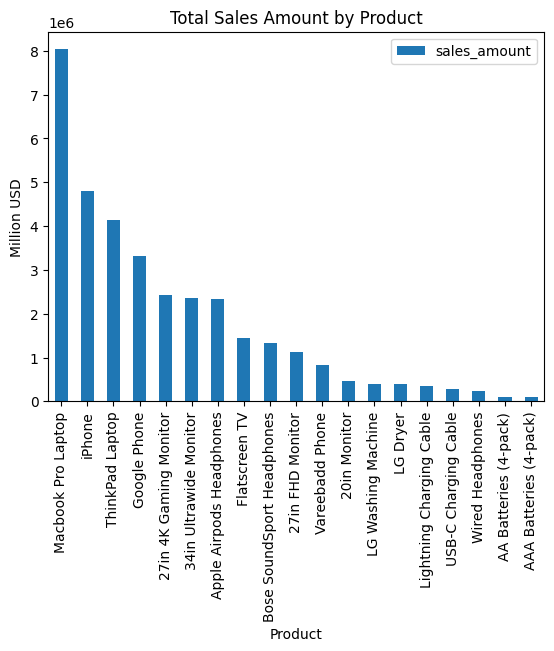

In [39]:
# Top-selling products based on total sales

(df
.groupby("product")
.agg({"sales_amount":"sum"})
.sort_values(by="sales_amount", ascending=False)
.plot.bar(
    title="Total Sales Amount by Product",
    ylabel="Million USD",
    xlabel="Product")
)

<Axes: title={'center': 'Quantity Sold by Product'}, xlabel='Product'>

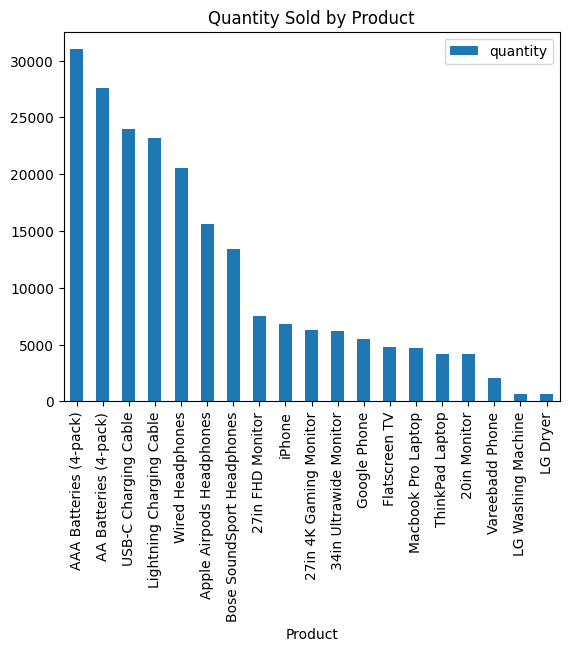

In [40]:
# Top-selling products based on quantity sold

(df
 .groupby("product")
 .agg({"quantity":"sum"})
 .sort_values(by="quantity", ascending=False)
 .plot.bar(
     title="Quantity Sold by Product",
     xlabel="Product")
)

<Axes: title={'center': 'Revenue by City'}, xlabel='City', ylabel='Million USD'>

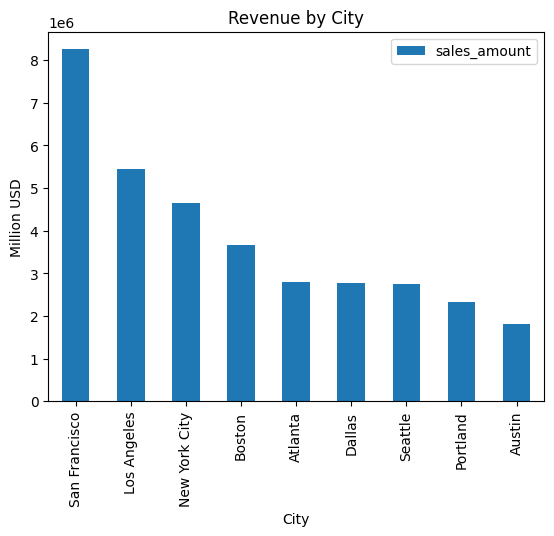

In [41]:
# Revenue by city

(df
 .groupby("city")
 .agg({"sales_amount":"sum"})
 .sort_values(by="sales_amount", ascending=False)
 .plot.bar(
     title="Revenue by City",
     ylabel="Million USD",
     xlabel="City")
)

(0.0, 4747639.8270000005)

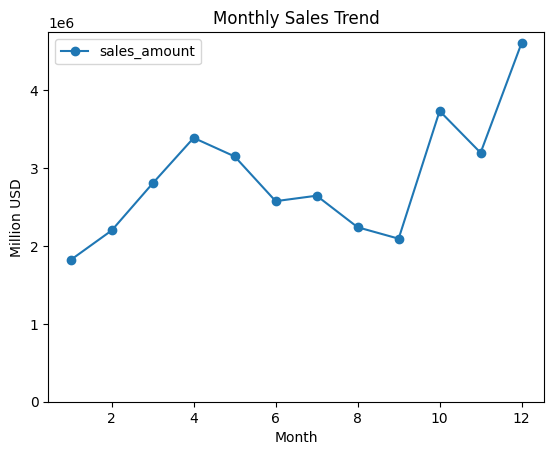

In [42]:
# Monthly Sales Trend

monthly_sales = (df
                 .groupby("month")
                 .agg({"sales_amount":"sum"})
                 .plot(
                     title="Monthly Sales Trend",
                     ylabel="Million USD",
                     xlabel="Month",
                     marker="o")
                )

monthly_sales.set_ylim(0)

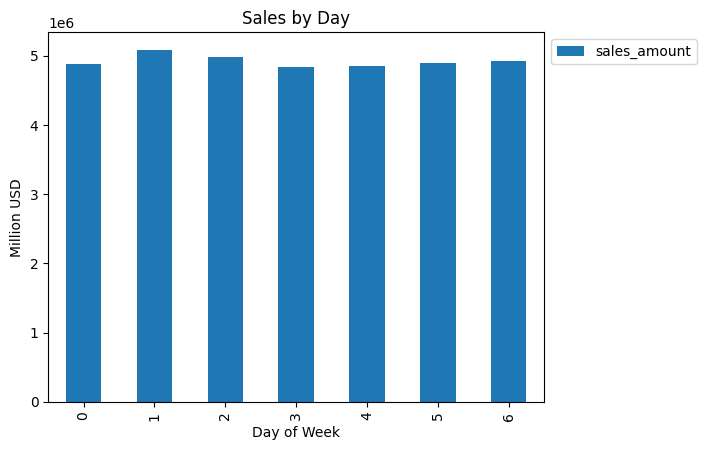

In [43]:
# Sales by Day

day_sales = (df
             .groupby("day_of_week")
             .agg({"sales_amount":"sum"})
             .plot.bar(
                 title="Sales by Day",
                 ylabel="Million USD",
                 xlabel="Day of Week")
             .legend(bbox_to_anchor=(1,1))
            )


day_sales

<Axes: title={'center': 'Hourly Sales Distribution'}, xlabel='Hour', ylabel='Million USD'>

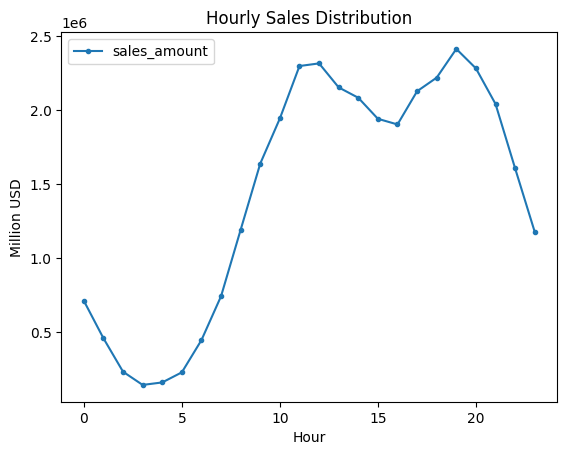

In [45]:
# Hourly Sales Distribution

(df
 .groupby("hour")
 .agg({"sales_amount":"sum"})
 .plot(
     title="Hourly Sales Distribution",
     ylabel="Million USD",
     xlabel="Hour",
     marker=".")
)

<Axes: title={'center': 'Hourly Sales Distribution'}, xlabel='Hour', ylabel='Million USD'>

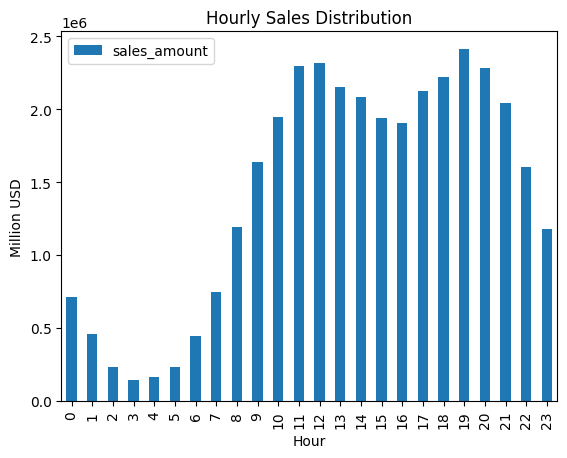

In [47]:
# Hourly Sales Distribution in bar graph.

(df
 .groupby("hour")
 .agg({"sales_amount":"sum"})
 .plot.bar(
     title="Hourly Sales Distribution",
     ylabel="Million USD",
     xlabel="Hour")
)

# Insights
* The Macbook Pro Laptop stands out as the highest-performing product, contributing the most to total sales.
* Both AAA Batteries (4-pack) and AA Batteries (4-pack), emerge as top-selling products by quantity, followed by charging cables.
* The products ranking highest in terms of "quantity" are positioned at the bottom in total sales, attributed to their lower pricing compared to other items in the product range.
* San Francisco leads in sales, contributing the highest revenue, followed by Los Angeles and New York City. The data underscores the significant market presence in major metropolitan areas.
* The data shows a seasonal pattern, with peak sales in October, November, and December, reflecting increased consumer spending during the holiday season. Following the holiday season, a decline in sales is observed, indicating diminished consumer activity post-holidays.
* The overall trend shows a slight increase from Monday to Tuesday, followed by relatively consistent sales throughout the rest of the week.
* Sales peak during late morning to early afternoon, notably between 10 AM and 2 PM, and again from 5 PM to 8 PM. This insight is crucial for refining staffing and marketing strategies, enabling the business to enhance customer service by ensuring adequate staffing during peak hours.